In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [3]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df[df.isnull().any(axis=1)]
# We dropped these as there was no correlation between the values with nas and any other factor. 
# It was simply random and missing. there were only 310 rows missing so we thought it would not impact our dataset
df = df.dropna()

In [5]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [6]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [7]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [8]:
df["satisfaction"] = df["satisfaction"].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df["Customer Type"] = df["Customer Type"].replace({'disloyal Customer': 0, 'Loyal Customer':1})
df["Type of Travel"] = df["Type of Travel"].replace({'Personal Travel': 0, 'Business travel':1})
df["Class"] = df["Class"].replace({'Eco': 1, 'Business':2,'Eco Plus':3})
df

C:\Users\kged2\AppData\Local\Temp\ipykernel_15148\1757774004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["satisfaction"] = df["satisfaction"].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
C:\Users\kged2\AppData\Local\Temp\ipykernel_15148\1757774004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
C:\Users\kged2\AppData\Local\Temp\ipykernel_15148\1757774004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,3,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,23,1,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,0,22,1,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [9]:
# Segmenting dataset into target and data
target= df.values[:,22]
print(target)


[0. 0. 1. ... 0. 0. 0.]


In [10]:
data= df.values[:,0:21]
print(data)

[[ 0.  1. 13. ...  5.  5. 25.]
 [ 0.  0. 25. ...  4.  1.  1.]
 [ 1.  1. 26. ...  4.  5.  0.]
 ...
 [ 0.  0. 30. ...  5.  4.  7.]
 [ 1.  0. 22. ...  4.  1.  0.]
 [ 0.  1. 27. ...  3.  1.  0.]]


In [11]:
#  CLASSIFIER: LOGISTIC REGRESSION
#Split the data into training and testing
#Import the model
#DEFAULT PARAMETERS
import sklearn
assert sklearn.__version__ >= ".20"
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data,target,test_size=0.30)
lm=LogisticRegression()
lm.fit(x_train,y_train)
lm.predict_proba(x_test)
prediction1= lm.predict(x_test)

C:\Users\kged2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
#  CLASSIFIER: LOGISTIC REGRESSION - CONFUSION MATRIX
from sklearn import metrics
confusion_matrix1= metrics.confusion_matrix(y_test,prediction1)
print(confusion_matrix1)

[[14025  3610]
 [ 3292 10152]]


In [13]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#ax=sns.heatmap((confusion_matrix1/np.sum(confusion_matrix1)),annot=True,fmt='.2%',cmap='Blues')
#plt.title('Logistic Regression - Confusion Matrix')
#plt.xlabel('Predicted Values',fontsize=10)
#plt.ylabel('True Values',fontsize=10)
#plt.show()

In [14]:
# CLASSIFIER: LOGISTIC REGRESSION - CLASSIFICATION REPORT
#DEFAULT PARAMETERS
print(metrics.classification_report(y_test,prediction1))
#accuracy=0.75
#f1-score=0.78

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80     17635
         1.0       0.74      0.76      0.75     13444

    accuracy                           0.78     31079
   macro avg       0.77      0.78      0.77     31079
weighted avg       0.78      0.78      0.78     31079



In [15]:
#  CLASSIFIER: LOGISTIC REGRESSION  - CONFUSION MATRIX
#Split the data into training and testing
#Import the model
#CHANGING PARAMETERS 1
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data,target,test_size=0.30)
lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200)
lm.fit(x_train,y_train)
lm.predict_proba(x_test)
prediction1= lm.predict(x_test)
confusion_matrix1= metrics.confusion_matrix(y_test,prediction1)
print(confusion_matrix1)

[[13344  4295]
 [ 2430 11010]]


C:\Users\kged2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# CLASSIFIER: LOGISTIC REGRESSION - CLASSIFICATION REPORT
#CHANGING PARAMETERS 1
print(metrics.classification_report(y_test,prediction1))
#lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200)
#accuracy=0.79
#f1 score=0.81

              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80     17639
         1.0       0.72      0.82      0.77     13440

    accuracy                           0.78     31079
   macro avg       0.78      0.79      0.78     31079
weighted avg       0.79      0.78      0.78     31079



In [17]:
#Split the data into training and testing
#Import the model
#CHANGING PARAMETERS 2
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data,target,test_size=0.30)
lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200,multi_class='ovr',tol=0.0005)
lm.fit(x_train,y_train)
lm.predict_proba(x_test)
prediction1= lm.predict(x_test)
confusion_matrix1= metrics.confusion_matrix(y_test,prediction1)
print(confusion_matrix1)

[[13426  4129]
 [ 2376 11148]]


C:\Users\kged2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# CLASSIFIER: LOGISTIC REGRESSION - CLASSIFICATION REPORT
#CHANGING PARAMETERS 2
print(metrics.classification_report(y_test,prediction1))
#lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200,multi_class='ovr',tol=0.0005)
#accuracy=0.78
#f1-score=0.78

              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80     17555
         1.0       0.73      0.82      0.77     13524

    accuracy                           0.79     31079
   macro avg       0.79      0.79      0.79     31079
weighted avg       0.80      0.79      0.79     31079



In [34]:
#  CLASSIFIER: LOGISTIC REGRESSION  - CONFUSION MATRIX
#Split the data into training and testing
#Import the model
#CHANGING PARAMETERS 3
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data,target,test_size=0.30)
lm=LogisticRegression(penalty='l2',dual=False,C=0.2,class_weight='balanced',max_iter=1000)
lm.fit(x_train,y_train)
lm.predict_proba(x_test)
prediction1= lm.predict(x_test)
confusion_matrix1= metrics.confusion_matrix(y_test,prediction1)
print(confusion_matrix1)

[[15430  2321]
 [ 1933 11395]]


C:\Users\kged2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


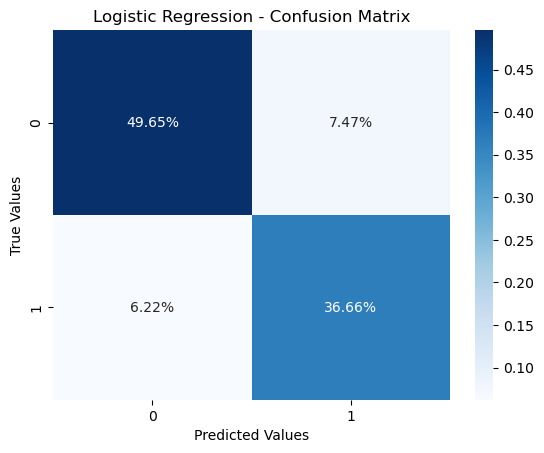

In [38]:
ax=sns.heatmap((confusion_matrix1/np.sum(confusion_matrix1)),annot=True,fmt='.2%',cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted Values',fontsize=10)
plt.ylabel('True Values',fontsize=10)
plt.show()

In [36]:
# CLASSIFIER: LOGISTIC REGRESSION - CLASSIFICATION REPORT
#CHANGING PARAMETERS 3
print(metrics.classification_report(y_test,prediction1))
#lm=LogisticRegression(penalty='l2',dual=False,C=0.5,class_weight='balanced',max_iter=200,multi_class='ovr',tol=0.0005)
#accuracy=0.86
#f1-score=0.88


              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     17751
         1.0       0.83      0.85      0.84     13328

    accuracy                           0.86     31079
   macro avg       0.86      0.86      0.86     31079
weighted avg       0.86      0.86      0.86     31079



In [21]:
#  CLASSIFIER: K NEAREST NEIGHBOURS -CONFUSION MATRIX

from sklearn.neighbors import KNeighborsClassifier
x2_train,x2_test,y2_train,y2_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
knn_model=KNeighborsClassifier()#add parameters to increase accuracy
knn_model.fit(x2_train,y2_train)#add parameters to increase accuracy
print(knn_model)
prediction2=knn_model.predict(x2_test)
confusion_matrix2=metrics.confusion_matrix(y2_test,prediction2)
print(confusion_matrix2)



KNeighborsClassifier()
[[14230  3429]
 [ 4253  9167]]


In [22]:
#bx=sns.heatmap((confusion_matrix2/np.sum(confusion_matrix2)),annot=True,fmt='.2%',cmap='Oranges')
#plt.title('K Nearest Neighbours - Confusion Matrix')
#plt.xlabel('Predicted Values',fontsize=10)
#plt.ylabel('True Values',fontsize=10)
#plt.show()

In [23]:
# CLASSIFIER: K NEAREST NEIGHBOURS - CLASSIFICATION REPORT
print(metrics.classification_report(y2_test,prediction2))
#accuracy=0.75
#f1-score= 0.79

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79     17659
         1.0       0.73      0.68      0.70     13420

    accuracy                           0.75     31079
   macro avg       0.75      0.74      0.75     31079
weighted avg       0.75      0.75      0.75     31079



In [39]:
#  CLASSIFIER: K NEAREST NEIGHBOURS -CONFUSION MATRIX
#CHANGING PARAMETERS 1

x2_train,x2_test,y2_train,y2_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
knn_model=KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='kd_tree',leaf_size=60,p=1,n_jobs=2)
knn_model.fit(x2_train,y2_train)
print(knn_model)
prediction2=knn_model.predict(x2_test)
confusion_matrix2=metrics.confusion_matrix(y2_test,prediction2)
print(confusion_matrix2)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=60, n_jobs=2,
                     n_neighbors=10, p=1, weights='distance')
[[15228  2380]
 [ 2897 10574]]


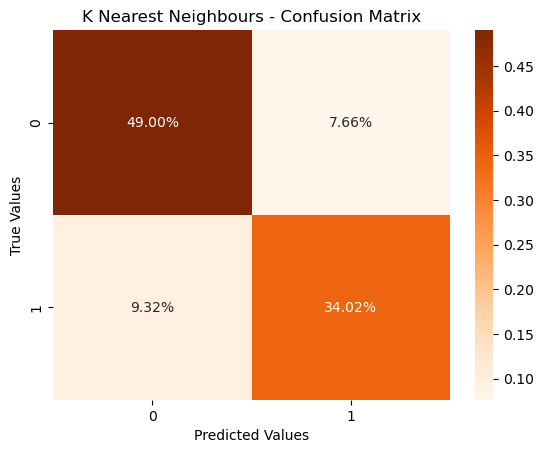

In [40]:
bx=sns.heatmap((confusion_matrix2/np.sum(confusion_matrix2)),annot=True,fmt='.2%',cmap='Oranges')
plt.title('K Nearest Neighbours - Confusion Matrix')
plt.xlabel('Predicted Values',fontsize=10)
plt.ylabel('True Values',fontsize=10)
plt.show()

In [41]:
# CLASSIFIER: K NEAREST NEIGHBOURS - CLASSIFICATION REPORT
#CHANGING PARAMETERS 1
print(metrics.classification_report(y2_test,prediction2))
#accuracy = 0.83

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     17608
         1.0       0.82      0.78      0.80     13471

    accuracy                           0.83     31079
   macro avg       0.83      0.82      0.83     31079
weighted avg       0.83      0.83      0.83     31079



In [26]:
#  CLASSIFIER: K NEAREST NEIGHBOURS -CONFUSION MATRIX
#CHANGING PARAMETERS 2

x2_train,x2_test,y2_train,y2_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
knn_model=KNeighborsClassifier(n_neighbors=20,weights='distance',algorithm='kd_tree',leaf_size=70,p=1,n_jobs=5)
knn_model.fit(x2_train,y2_train)
print(knn_model)
prediction2=knn_model.predict(x2_test)
confusion_matrix2=metrics.confusion_matrix(y2_test,prediction2)
print(confusion_matrix2)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=70, n_jobs=5,
                     n_neighbors=20, p=1, weights='distance')
[[15290  2376]
 [ 3063 10350]]


In [27]:
# CLASSIFIER: K NEAREST NEIGHBOURS - CLASSIFICATION REPORT
#CHANGING PARAMETERS 2
print(metrics.classification_report(y2_test,prediction2))
#accuracy = 0.83 #incrementing n_neighbros, leaf_size and n_jobs does not increment accuracy
#f1-score= 0.85

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85     17666
         1.0       0.81      0.77      0.79     13413

    accuracy                           0.82     31079
   macro avg       0.82      0.82      0.82     31079
weighted avg       0.82      0.82      0.82     31079



In [28]:
#  CLASSIFIER: K NEAREST NEIGHBOURS -CONFUSION MATRIX
#CHANGING PARAMETERS 3

x2_train,x2_test,y2_train,y2_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
knn_model=KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='ball_tree',leaf_size=60,p=1,n_jobs=2)
knn_model.fit(x2_train,y2_train)
print(knn_model)
prediction2=knn_model.predict(x2_test)
confusion_matrix2=metrics.confusion_matrix(y2_test,prediction2)
print(confusion_matrix2)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=60, n_jobs=2,
                     n_neighbors=10, p=1, weights='distance')
[[15312  2295]
 [ 2900 10572]]


In [29]:
# CLASSIFIER: K NEAREST NEIGHBOURS - CLASSIFICATION REPORT
#CHANGING PARAMETERS 3
print(metrics.classification_report(y2_test,prediction2))
#accuracy = 0.83 # changing the algorithm used to compute the nearest neighbors to 'ball_tree' does not improve accuracy 
#f1-score=0.85

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85     17607
         1.0       0.82      0.78      0.80     13472

    accuracy                           0.83     31079
   macro avg       0.83      0.83      0.83     31079
weighted avg       0.83      0.83      0.83     31079



In [43]:
#  CLASSIFIER: DECISION TREE - CONFUSION MATRIX
from sklearn.tree import DecisionTreeClassifier
x3_train,x3_test,y3_train,y3_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
dt_model=DecisionTreeClassifier()
dt_model.fit(x3_train,y3_train)
print(dt_model)
prediction3=dt_model.predict(x3_test)
confusion_matrix3=metrics.confusion_matrix(y3_test,prediction3)
print(confusion_matrix3)

DecisionTreeClassifier()
[[16657   940]
 [  820 12662]]


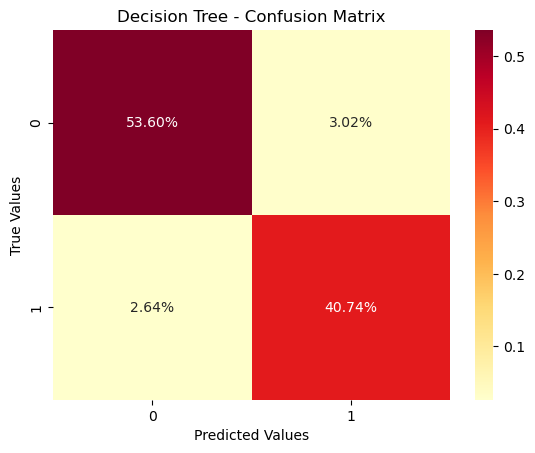

In [44]:
cx=sns.heatmap((confusion_matrix3/np.sum(confusion_matrix3)),annot=True,fmt='.2%',cmap='YlOrRd')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted Values',fontsize=10)
plt.ylabel('True Values',fontsize=10)
plt.show()

In [45]:
# CLASSIFIER: DECISION TREE - CLASSIFICATION REPORT
print(metrics.classification_report(y3_test,prediction3))
#accuracy=0.94
#f1-score= 0.95

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     17597
         1.0       0.93      0.94      0.94     13482

    accuracy                           0.94     31079
   macro avg       0.94      0.94      0.94     31079
weighted avg       0.94      0.94      0.94     31079



In [ ]:
#  CLASSIFIER: DECISION TREE - CONFUSION MATRIX
#CHANGING PARAMETERS 1

x3_train,x3_test,y3_train,y3_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
dt_model=DecisionTreeClassifier(criterion='entropy',splitter='random',max_features='log2',max_depth=20,min_samples_split=5,min_samples_leaf=2,max_leaf_nodes=20)
dt_model.fit(x3_train,y3_train)
print(dt_model)
prediction3=dt_model.predict(x3_test)
confusion_matrix3=metrics.confusion_matrix(y3_test,prediction3)
print(confusion_matrix3)

In [ ]:
# CLASSIFIER: DECISION TREE - CLASSIFICATION REPORT
#CHANGING PARAMETERS 1
print(metrics.classification_report(y3_test,prediction3))
#accuracy=0.82 #Changing the default parameters decreased accuracy
#f1-score= 0.84

In [ ]:
#  CLASSIFIER: DECISION TREE - CONFUSION MATRIX
#CHANGING PARAMETERS 2

x3_train,x3_test,y3_train,y3_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
dt_model=DecisionTreeClassifier(criterion='gini',splitter='random',max_features='sqrt',max_depth=20,min_samples_split=5,min_samples_leaf=2,max_leaf_nodes=20)
dt_model.fit(x3_train,y3_train)
print(dt_model)
prediction3=dt_model.predict(x3_test)
confusion_matrix3=metrics.confusion_matrix(y3_test,prediction3)
print(confusion_matrix3)

In [ ]:
# CLASSIFIER: DECISION TREE - CLASSIFICATION REPORT
#CHANGING PARAMETERS 2
print(metrics.classification_report(y3_test,prediction3))
#accuracy=0.85 #Changing criterion to 'gini' and max_features='sqrt' improved accuracy
#f1-score= 0.87

In [ ]:
#  CLASSIFIER: DECISION TREE - CONFUSION MATRIX
#CHANGING PARAMETERS 3

x3_train,x3_test,y3_train,y3_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
dt_model=DecisionTreeClassifier(criterion='gini',splitter='random',max_features='sqrt',max_depth=50,min_samples_split=20,min_samples_leaf=10,max_leaf_nodes=40)
dt_model.fit(x3_train,y3_train)
print(dt_model)
prediction3=dt_model.predict(x3_test)
confusion_matrix3=metrics.confusion_matrix(y3_test,prediction3)
print(confusion_matrix3)

In [ ]:
# CLASSIFIER: DECISION TREE - CLASSIFICATION REPORT
#CHANGING PARAMETERS 3
print(metrics.classification_report(y3_test,prediction3))
#accuracy=0.83 #Setting higher values for the int parameters decreased accuracy. 
#f1-score=0.83
#conclusion: default parameters are the best fit for the model


In [46]:
#  CLASSIFIER: NAIVE BAYES - CONFUSION MATRIX

from sklearn.naive_bayes import GaussianNB
x4_train,x4_test,y4_train,y4_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
nb_model=GaussianNB()
nb_model.fit(x4_train,y4_train)
prediction4=nb_model.predict(x4_test)
confusion_matrix4=metrics.confusion_matrix(y4_test,prediction4)
print(confusion_matrix4)

[[15951  1656]
 [ 2467 11005]]


In [47]:
#dx=sns.heatmap((confusion_matrix4/np.sum(confusion_matrix4)),annot=True,fmt='.2%',cmap='RdPu')
#plt.title('Naive Bayes - Confusion Matrix')
#plt.xlabel('Predicted Values',fontsize=10)
#plt.ylabel('True Values',fontsize=10)
#plt.show()

In [48]:
# CLASSIFIER: NAIVE BAYES - CLASSIFICATION REPORT
print(metrics.classification_report(y4_test,prediction4))
#accuracy=0.87
#f1-score=0.89

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     17607
         1.0       0.87      0.82      0.84     13472

    accuracy                           0.87     31079
   macro avg       0.87      0.86      0.86     31079
weighted avg       0.87      0.87      0.87     31079



In [49]:
#  CLASSIFIER: NAIVE BAYES - CONFUSION MATRIX
#CHANGING PARAMETERS 1

x4_train,x4_test,y4_train,y4_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
nb_model=GaussianNB(var_smoothing=1e-20)
nb_model.fit(x4_train,y4_train)
prediction4=nb_model.predict(x4_test)
confusion_matrix4=metrics.confusion_matrix(y4_test,prediction4)
print(confusion_matrix4)

[[15881  1587]
 [ 2468 11143]]


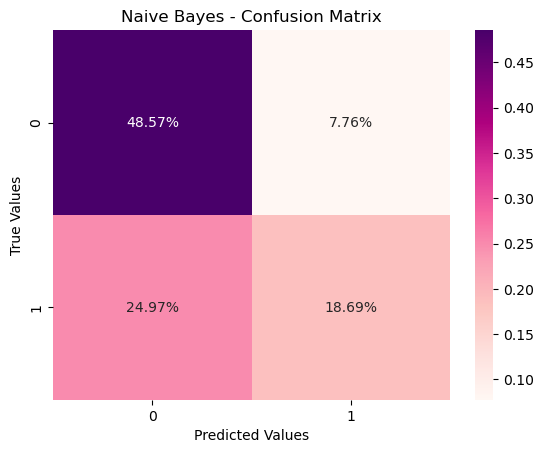

In [53]:
dx=sns.heatmap((confusion_matrix4/np.sum(confusion_matrix4)),annot=True,fmt='.2%',cmap='RdPu')
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted Values',fontsize=10)
plt.ylabel('True Values',fontsize=10)
plt.show()

In [50]:
# CLASSIFIER: NAIVE BAYES - CLASSIFICATION REPORT
#CHANGING PARAMETERS 1
print(metrics.classification_report(y4_test,prediction4))
#accuracy=0.87 # Changing the var_smoothing to a smaller value does not improve accuracy
#f1-score=0.89

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     17468
         1.0       0.88      0.82      0.85     13611

    accuracy                           0.87     31079
   macro avg       0.87      0.86      0.87     31079
weighted avg       0.87      0.87      0.87     31079



In [51]:
#  CLASSIFIER: NAIVE BAYES - CONFUSION MATRIX
#CHANGING PARAMETERS 2

x4_train,x4_test,y4_train,y4_test=sklearn.model_selection.train_test_split(data,target,test_size=0.3)
nb_model=GaussianNB(var_smoothing=1e-4)
nb_model.fit(x4_train,y4_train)
prediction4=nb_model.predict(x4_test)
confusion_matrix4=metrics.confusion_matrix(y4_test,prediction4)
print(confusion_matrix4)

[[15096  2413]
 [ 7760  5810]]


In [52]:
# CLASSIFIER: NAIVE BAYES - CLASSIFICATION REPORT
#CHANGING PARAMETERS 2
print(metrics.classification_report(y4_test,prediction4))
#accuracy=0.68 Changing the var_smoothing to a greater value does not improve accuracy
#f1-score=0.76

              precision    recall  f1-score   support

         0.0       0.66      0.86      0.75     17509
         1.0       0.71      0.43      0.53     13570

    accuracy                           0.67     31079
   macro avg       0.68      0.65      0.64     31079
weighted avg       0.68      0.67      0.65     31079



Conclusion:

The best classifier that fits the model is "Decision Tree" with its default parameters displaying an accuracy of 94%
-A classification report is a collection of different evaluation metrics.
- Read Classification report Anatomy for deeper analysis
-Use this link to help write analysis
https://www.youtube.com/watch?v=XiUlqN1Ay0U

Questions:

-I want to make a table out of the results. Is there a function I can use to extract results from classification report? or do I have to calculate the evaluation methods separately to build the table?